In [1]:

%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt

6409
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(100):
    plt.close()

In [3]:
# ----------------------------------------------------------------------
# Compute coefficients for the estimation of the QSVT angles necessary
# for the inversion of a matrix with an arbitrary condition number.
# ----------------------------------------------------------------------

In [3]:
# -----------------------------------------
# --- 1. Read reference data ----
# -----------------------------------------
mix.reload_module(eqsvt)

flag_save_gl_ = False

# paths where pre-computed QSVT angles are saved and
#     where resulting parameters for the estimation of the QSVT angles will be saved:
path_root_       = "./tools/QSVT-angles/inversion/"
path_save_plots_ = path_root_ + "/saved-plots/"

# --- Reference case: id_case_, Ncoefs_ = 8, 20 ---
id_case_, Ncoefs_ = 8, 20
dds_, id_comp_, fname_ = eqsvt.read_ref_QSVT_angles(id_case_, Ncoefs_)


----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-5/k10_eps8.hdf5
when simulated:  03-14-2024 17:54:35

function-type: 		inversion
function-parity: 		1
param: 			10.000000
absolute error: 	1.040e-08
norm. factor: 		1.250e-01
Number of angles: 	382

----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-5/k20_eps8.hdf5
when simulated:  03-14-2024 17:54:37

function-type: 		inversion
function-parity: 		1
param: 			20.000000
absolute error: 	1.067e-08
norm. factor: 		1.250e-01
Number of angles: 	762

----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-5/k30_eps8.hdf5
when simulated:  03-14-2024 17:54:44

function-type: 		inversion
function-parity: 		1
param: 			30.000000
absolute error: 	1.059e-08
norm. factor: 		1.250e-01
Number of angles: 	1144

----------------------------------------
Reading angles from the 

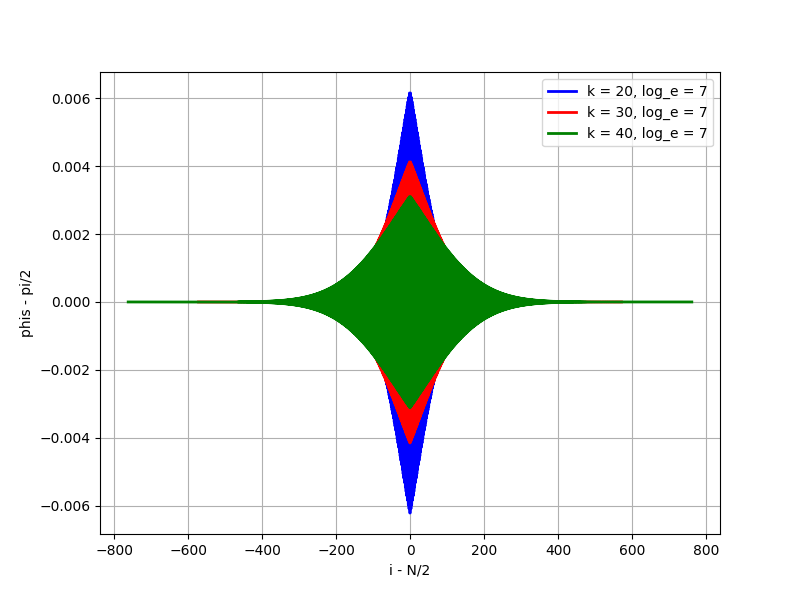

maximum difference between pos. and neg. max angles: 2.480e-04


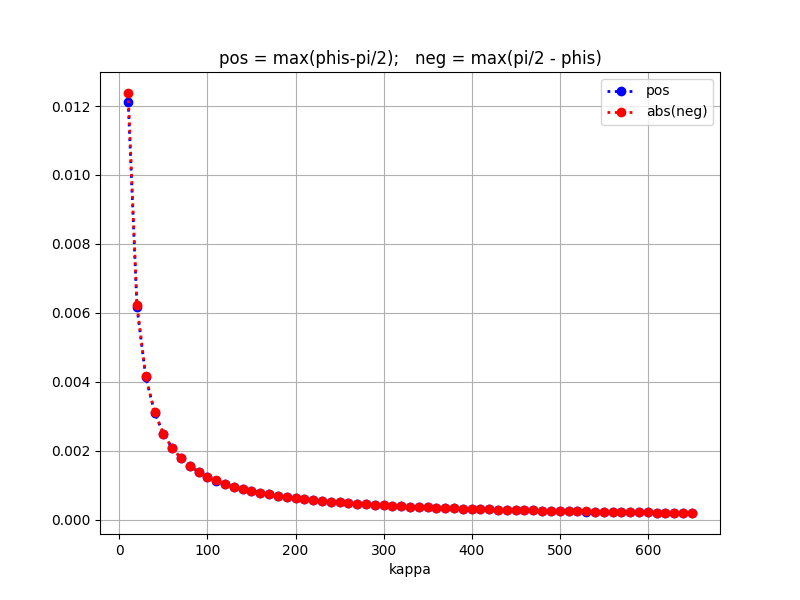

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


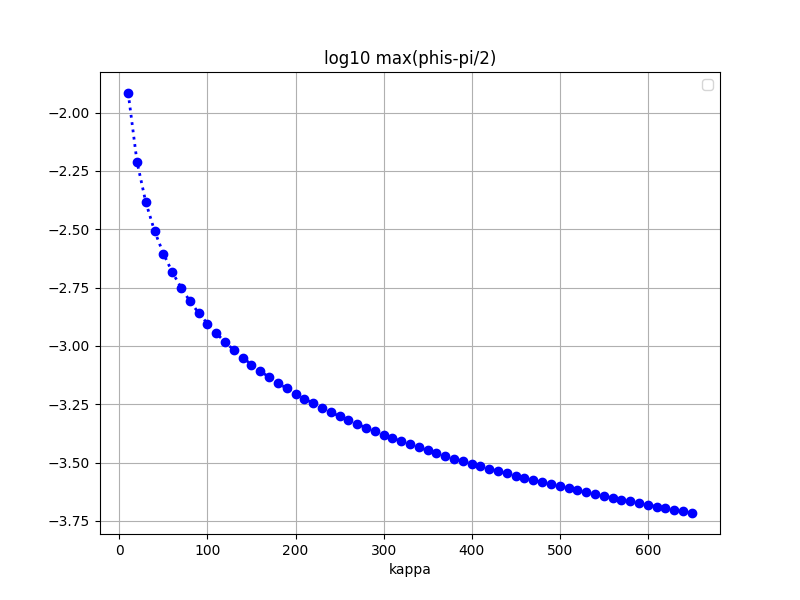

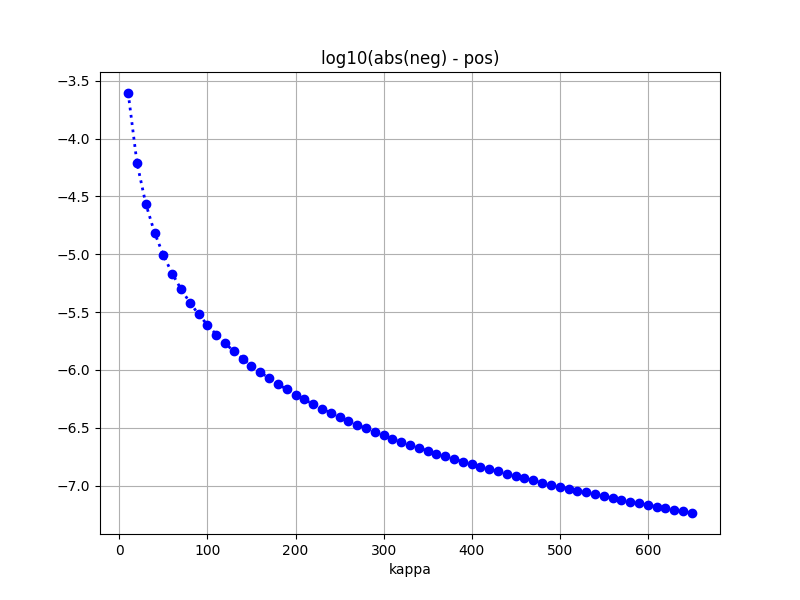

In [4]:
# -----------------------------------------
# --- PLOT angles ----
# -----------------------------------------
mix.reload_module(eqsvt)

eqsvt.plot_angles(
    dds_, 
    [1, 2, 3], 
    flag_save = True & flag_save_gl_,
    path_save_plots = path_save_plots_,
    flag_shifted = True
) 

# --- Plot maximum values of the angles ----
eqsvt.plot_max(
    dds_,
    flag_save = False,
    path_save_plots = path_save_plots_
)


--- Estimation coefs for neg amplitudes ---
max. abs. err: 9.013e-13


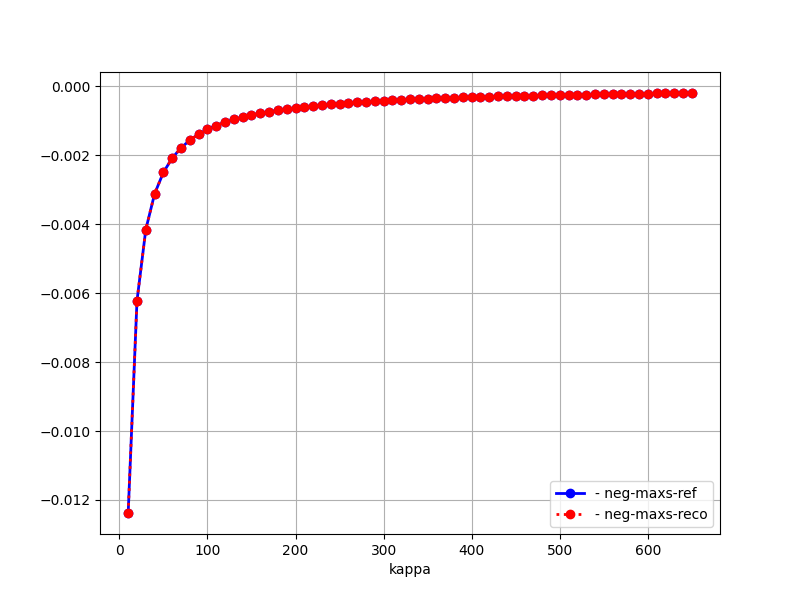


--- Estimation coefs for pos amplitudes ---
max. abs. err: 1.810e-12


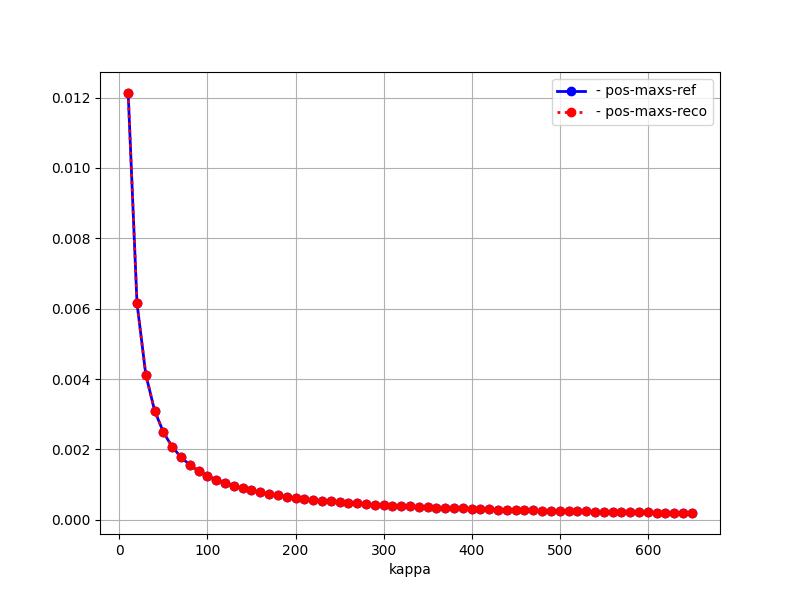


--- pos ampl: coefs ---
[-7.464e-14  1.250e-01 -3.665e-02 -4.556e-03  2.243e-03]

--- neg ampl: coefs ---
[-3.394e-13 -1.250e-01  1.222e-02  6.512e-04 -3.152e-06]


In [10]:
# -------------------------------------------------------------------------
# --- 2. COMPUTE coefficients for estimating angles' AMPLITUDES ---
mix.reload_module(eqsvt)
coefs_ampl_neg_, coefs_ampl_pos_ = eqsvt.compute_coefs_amplitudes(
    dds_,
    Ncoefs = 5,
    flag_save = False,
    path_save_plots = path_save_plots_
)

Extracting environment...
NEG: true
POS: true

full number of angles: 23520
N of NEG. peaks: 11760
N of POS. peaks: 11760

N_env-half-NEG: 5880
N_env-half-POS: 5880
The envelope for the kappa = 650 is taken.
Normalized POS. ENV: max. absolute error: 1.242e-07
Normalized NEG. ENV: max. absolute error: 1.244e-07


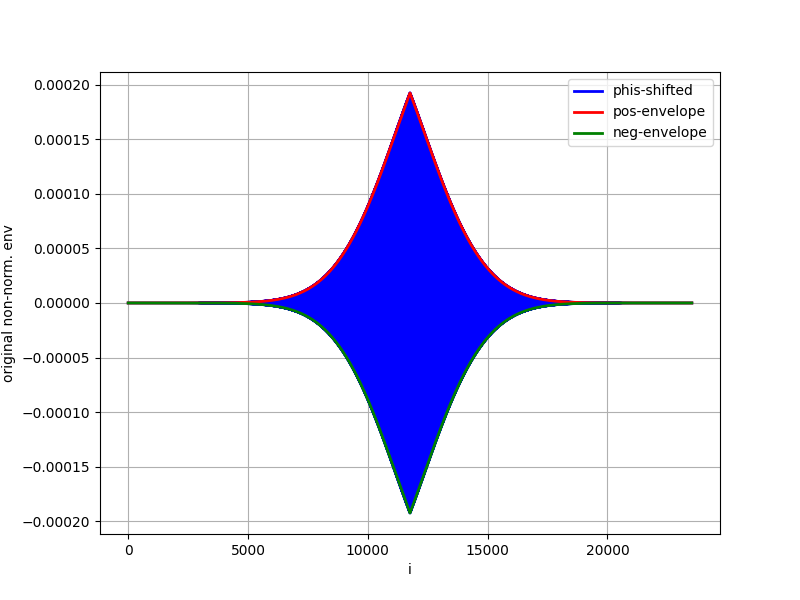

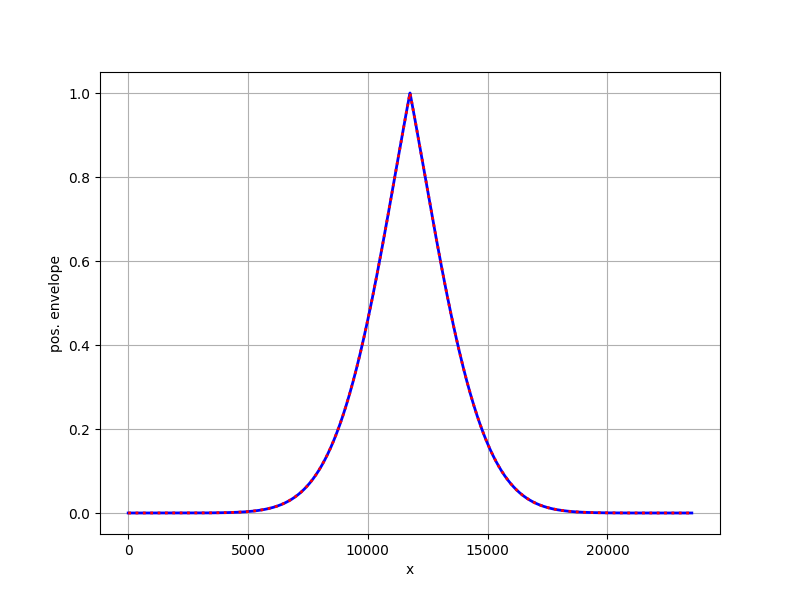

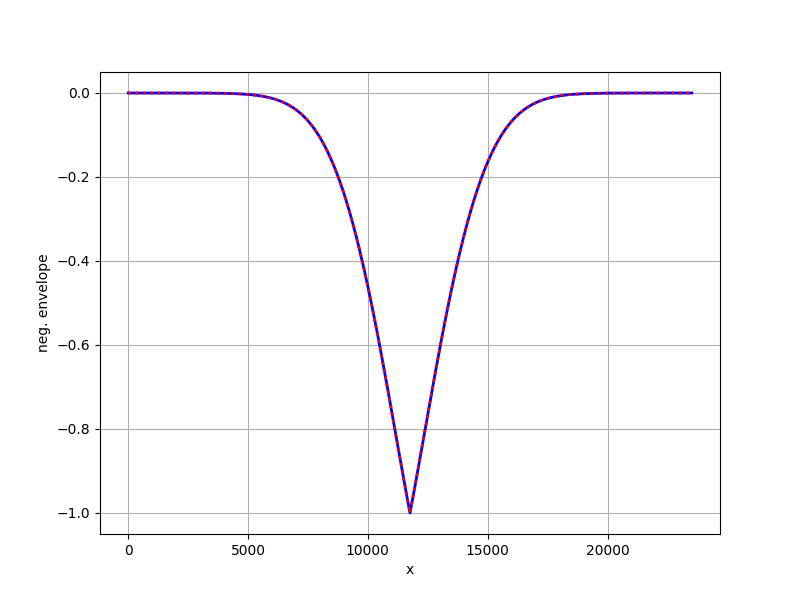

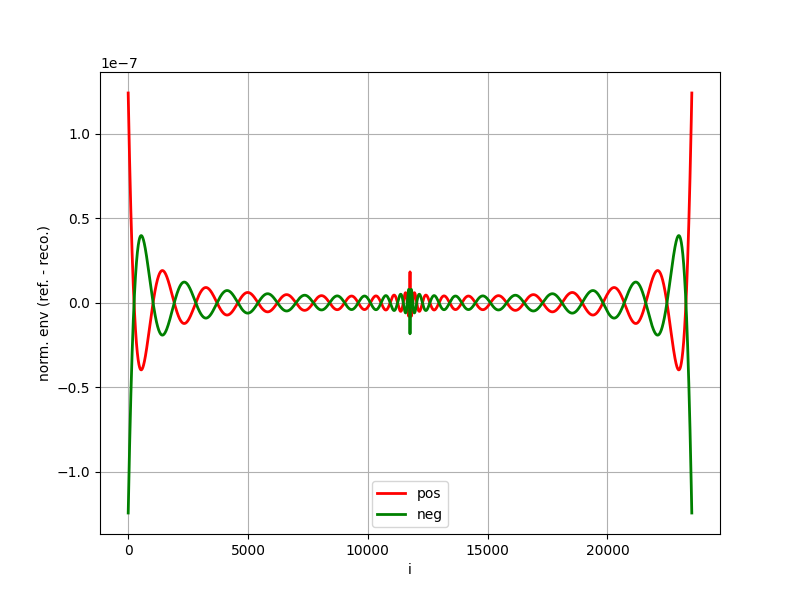



--- Reconstructing the QSVT angles for the same kappa ---
1. The envelope of the QSVT angles are approximated by the computed coefs.
2. The number of the QSVT angles and their absolute amplitudes are taken from the reference QSVT case.

max-abs-err in final (non-normalized) reconstructed QSVT angles: 2.392e-11


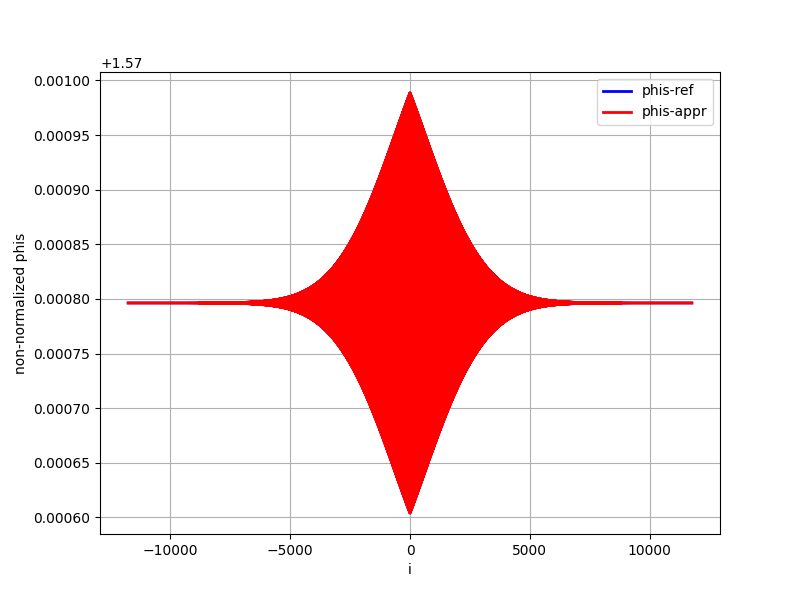

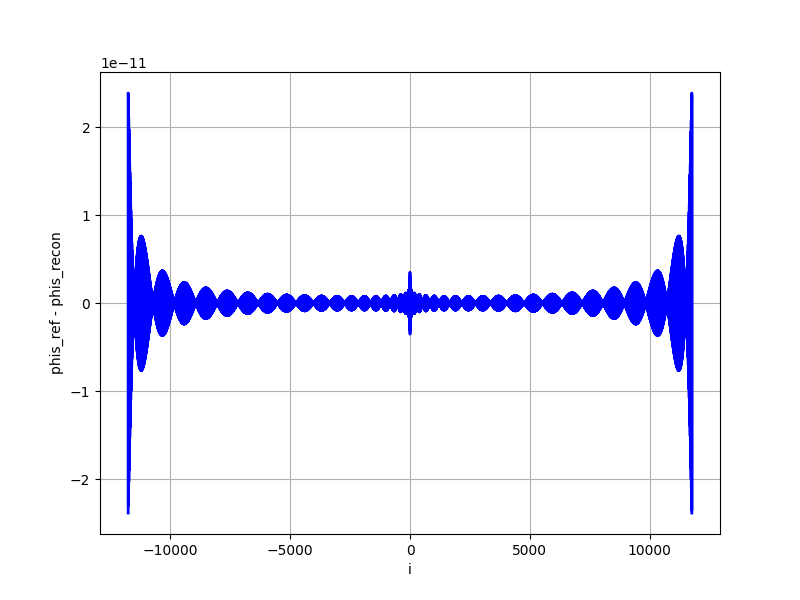

In [6]:
# ----------------------------------------------------------------------------------------
# --- 3. COMPUTE coefficients for estimating angles' envelope ---
# ----------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
coefs_shape_neg_, coefs_shape_pos_, N_half_env_neg_, N_half_env_pos_, phis_appr_ = \
    eqsvt.compute_coefs_envelop(
        dds_[id_comp_],
        Ncoefs = Ncoefs_,  
        flag_plot_envelop = True, 
        flag_plot_shape   = True,
        flag_reconstruct  = True
    )


--------------------------------------------------------------------
N-coefs = 160
Extracting environment...
NEG: true
POS: true

full number of angles: 23520
N of NEG. peaks: 11760
N of POS. peaks: 11760

N_env-half-NEG: 5880
N_env-half-POS: 5880
The envelope for the kappa = 650 is taken.
Normalized POS. ENV: max. absolute error: 1.704e-08
Normalized NEG. ENV: max. absolute error: 1.707e-08

--------------------------------------------------------------------
N-coefs = 80
Extracting environment...
NEG: true
POS: true

full number of angles: 23520
N of NEG. peaks: 11760
N of POS. peaks: 11760

N_env-half-NEG: 5880
N_env-half-POS: 5880
The envelope for the kappa = 650 is taken.
Normalized POS. ENV: max. absolute error: 3.422e-08
Normalized NEG. ENV: max. absolute error: 3.429e-08

--------------------------------------------------------------------
N-coefs = 40
Extracting environment...
NEG: true
POS: true

full number of angles: 23520
N of NEG. peaks: 11760
N of POS. peaks: 11760

N_e

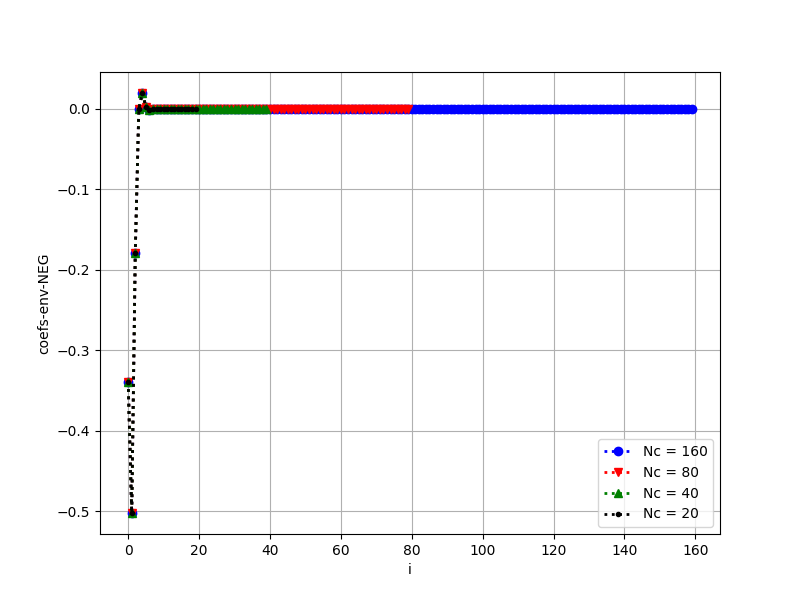

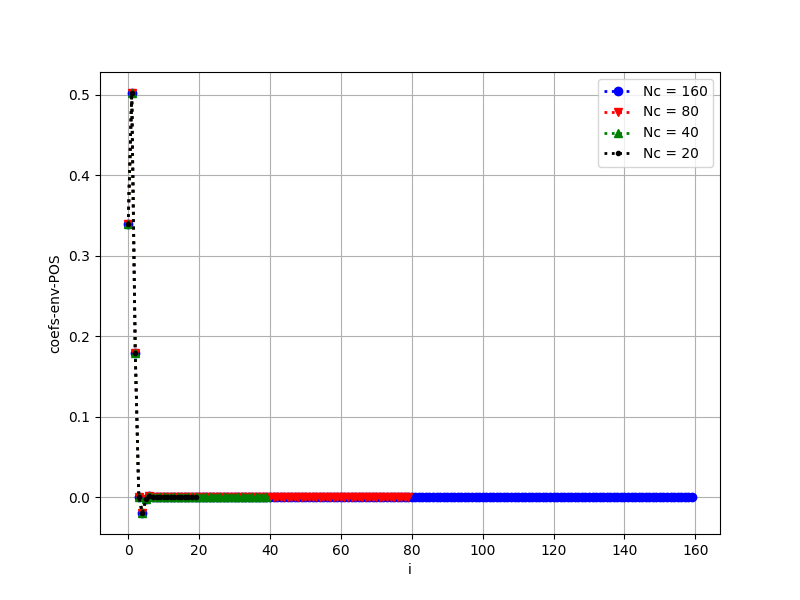

In [7]:
# ------------------------------------------------------
# --- PLOT the coefficients for the shape ---
# ------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.plot_env_coefs(
    dds_[id_comp_], 
    Ncoefs_arrs = [40, 30, 20, 10],
    flag_save = True & flag_save_gl_,
    path_save_plots = path_save_plots_
)

In [7]:
# ----------------------------------------------------------------------------------------
# --- 4. SAVE the computed metaparameters ---
# ----------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.store_estimation(
    dds_[id_comp_], fname_, path_root_,
    coefs_ampl_neg_, coefs_ampl_pos_,
    coefs_shape_neg_, coefs_shape_pos_
)

Storing the coefficients to:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case8-Nc20.hdf5


In [41]:
# -------------------------------------------------
# --- Scan: eps versus kappa ---
# -------------------------------------------------
def scan_kappa():

    # --- case = 6, Nc = 20 ---
    kappa_array = \
    [      
              1e2,       1e3,       5e3,       1e4,       5e4,       
              1e5,       5e5,       8e5,       
              1e6,       2e6,       5e6
    ]
    error_array = \
    [
        3.389e-05, 2.042e-06, 5.204e-06, 5.493e-06, 5.272e-06, 
        4.630e-06, 8.765e-07, 4.917e-06,
        7.617e-06, 2.109e-05, 6.140e-05,
    ]

    log_kappa = np.log10(kappa_array)
    log_err = np.log10(error_array)

    mix.save_dat_plot_1d_file(
        path_save_plots_ + "/direct_scan_err_Nc20.dat", 
        log_kappa, log_err
    )
    return
# --------------------------
scan_kappa()
del scan_kappa

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//direct_scan_err_Nc20.dat


In [4]:
# ---------------------------------------------------------------------------------------------
# --- Compute coefficients-envelop (CEs) for various reference kappa ---
# ---------------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
cns_, cps_, kappas_ = eqsvt.compute_coefs_var_kappa(
    dds_, 
    Ncoefs = Ncoefs_
)


Extracting environment...
NEG: true
POS: true

full number of angles: 382
N of NEG. peaks: 192
N of POS. peaks: 190

N_env-half-NEG: 96
N_env-half-POS: 95
The envelope for the kappa = 10 is taken.
Normalized POS. ENV: max. absolute error: 3.225e-08
Normalized NEG. ENV: max. absolute error: 2.743e-08
Extracting environment...
NEG: true
POS: true

full number of angles: 762
N of NEG. peaks: 382
N of POS. peaks: 380

N_env-half-NEG: 191
N_env-half-POS: 190
The envelope for the kappa = 20 is taken.
Normalized POS. ENV: max. absolute error: 3.264e-08
Normalized NEG. ENV: max. absolute error: 3.009e-08
Extracting environment...
NEG: true
POS: true

full number of angles: 1144
N of NEG. peaks: 572
N of POS. peaks: 572

N_env-half-NEG: 286
N_env-half-POS: 286
The envelope for the kappa = 30 is taken.
Normalized POS. ENV: max. absolute error: 2.970e-08
Normalized NEG. ENV: max. absolute error: 3.103e-08
Extracting environment...
NEG: true
POS: true

full number of angles: 1524
N of NEG. peaks: 

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_POS_env_kappa_c0.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_POS_env_kappa_c1.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_POS_env_kappa_c2.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_POS_env_kappa_c3.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_POS_env_kappa_c4.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_POS_env_kappa_c5.dat


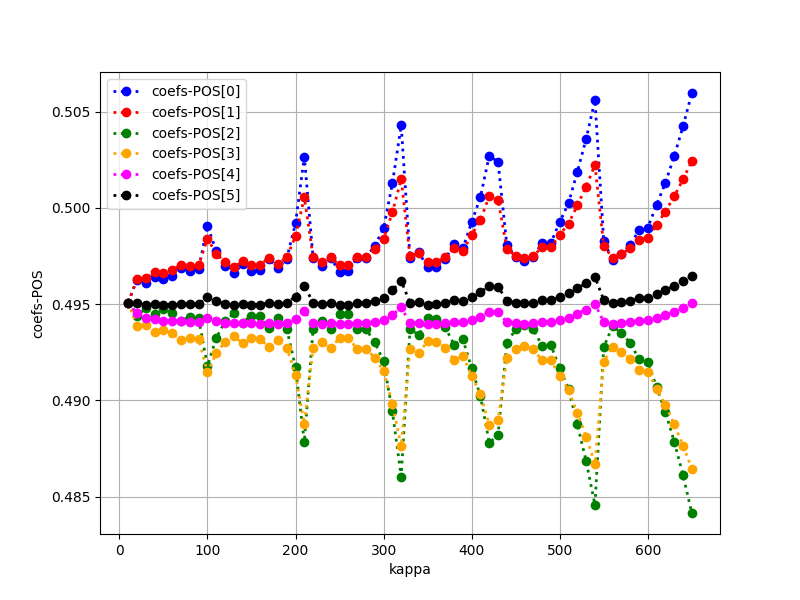

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_NEG_env_kappa_c0.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_NEG_env_kappa_c1.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_NEG_env_kappa_c2.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_NEG_env_kappa_c3.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_NEG_env_kappa_c4.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//coefs_NEG_env_kappa_c5.dat


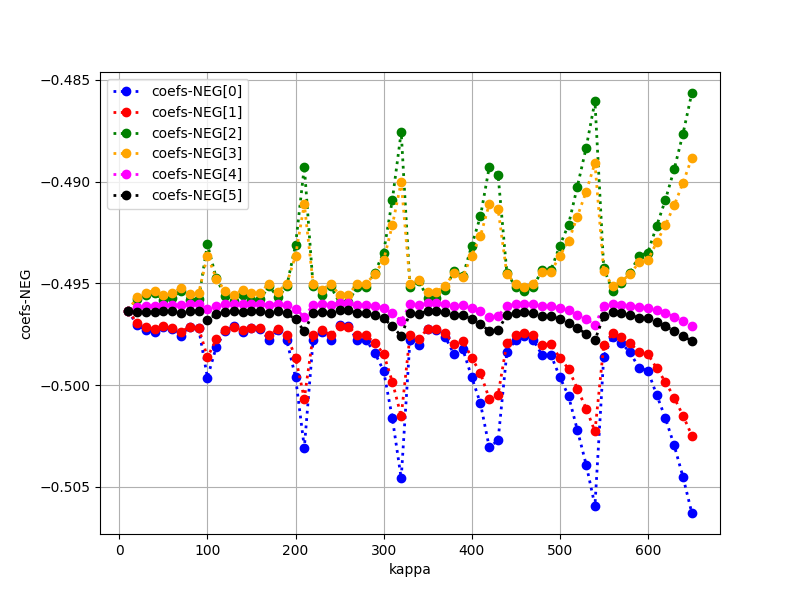

In [8]:

# ---------------------------------------------------------------------------------------------
# --- PLOT CEs for various reference kappa ---
# ---------------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.plot_coefs_var_kappa(
    cns_, cps_, kappas_,
    ids_ch_coef = [0,1,2,3,4,5], # which coefficients to plot;
    path_save_plots = path_save_plots_,
    flag_save = True,
    flag_shifted = True
)

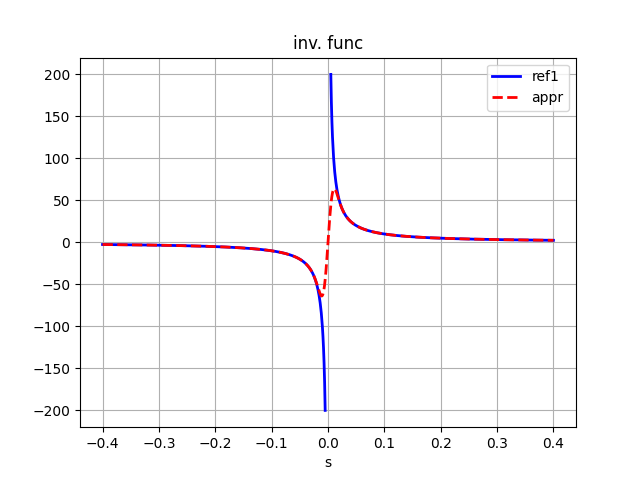

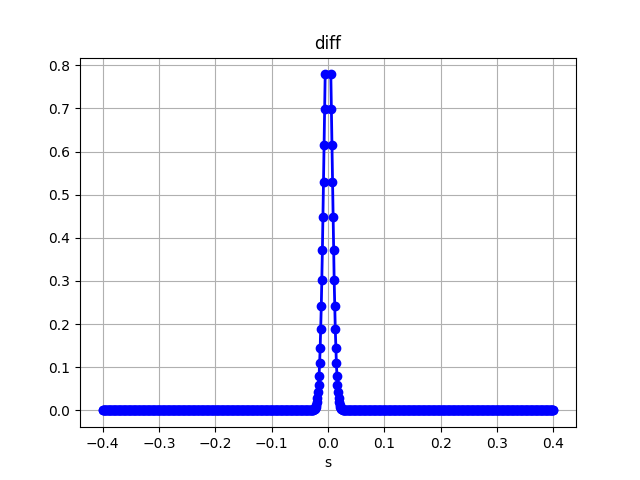

inv. kappa: 5.000e-02
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//inv_ref_1_k20.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//inv_ref_2_k20.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//inv_appr_k20.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//inv_rel_err_1_k20.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//inv_rel_err_2_k20.dat


In [49]:
# ---------------------------------------------------
# --- Plot 1/s ---
# ---------------------------------------------------
def plot_inv_function(kappa, N):
    ref_kappa = 1./kappa

    s_max = 0.4
    coef_sc = 0.1

    # --- the reference function ---
    s1 = np.linspace(coef_sc*ref_kappa, s_max, N)
    s2 = np.linspace(-s_max, -coef_sc * ref_kappa, N)
    y_ref1 = 1./s1
    y_ref2 = 1./s2

    # --- the approximating fnuction ---
    appr_func = lambda x: (1. - np.exp( -(5.*x*kappa)**2. )) / x
    y_app_1 = appr_func(s1)
    y_app_2 = appr_func(s2)

    s = np.linspace(-s_max, s_max, 4*N)
    y_app = appr_func(s)


    # --- Plotting the functions ---
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(s1, y_ref1, "b", linewidth = 2, label = "ref1")
    ax.plot(s2, y_ref2, "b", linewidth = 2)

    ax.plot(s, y_app, "r--", linewidth = 2, label = "appr")
    # ax.plot(s1, y_app_1, "r--", linewidth = 2, label = "appr")
    # ax.plot(s2, y_app_2, "r--", linewidth = 2, label = "appr")

    plt.xlabel('s')
    plt.title("inv. func")
    ax.legend()
    plt.grid(True)
    plt.show()

    # --- Plotting the difference ---
    err_1 = np.abs(y_ref1 - y_app_1)/y_ref1
    err_2 = np.abs(y_ref2 - y_app_2)/np.abs(y_ref2)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(s1, err_1, "b", linewidth = 2, marker = "o")
    ax.plot(s2, err_2, "b", linewidth = 2, marker = "o")
    plt.xlabel('s')
    plt.title("diff")
    plt.grid(True)
    plt.show()

    # --- Saving data ---
    print("inv. kappa: {:0.3e}".format(ref_kappa))

    mix.save_dat_plot_1d_file(path_save_plots_ + "/inv_ref_1_k{:d}.dat".format(int(kappa)), s1, y_ref1)
    mix.save_dat_plot_1d_file(path_save_plots_ + "/inv_ref_2_k{:d}.dat".format(int(kappa)), s2, y_ref2)
    mix.save_dat_plot_1d_file(path_save_plots_ + "/inv_appr_k{:d}.dat".format(int(kappa)), s, y_app)
    mix.save_dat_plot_1d_file(path_save_plots_ + "/inv_rel_err_1_k{:d}.dat".format(int(kappa)), s1, err_1)
    mix.save_dat_plot_1d_file(path_save_plots_ + "/inv_rel_err_2_k{:d}.dat".format(int(kappa)), s2, err_2)
    return
# ---------------------------------------------------
plot_inv_function(kappa = 20, N = 401)